## Neural Networks on MNIST classification

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X, y = mnist['data'], mnist['target']


In [4]:
import matplotlib.pyplot as plt
sample = 100

some_digit = X[sample]
some_digit_image = some_digit.reshape(8,8)

plt.imshow(some_digit_image, cmap='gray')
plt.axis("off")
plt.show()


<Figure size 640x480 with 1 Axes>

In [5]:
X_train, X_test, y_train, y_test = X[:1000], X[1000:], y[:1000], y[1000:]

#print(X_test.shape)

X_train = X_train.reshape(1000,8,8)
X_test = X_test.reshape(797,8,8)

## Fully Connected Neural Network

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[8, 8]))
model.add(keras.layers.Dense(300, activation="relu"))
#model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [7]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               19500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 22,510
Trainable params: 22,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [9]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 1000 samples, validate on 797 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 2.5842 - acc: 0.6260 - val_loss: 1.2466 - val_acc: 0.6725
Epoch 2/100
1000/1000 [==============================] - 0s 128us/step - loss: 0.2290 - acc: 0.9330 - val_loss: 0.8764 - val_acc: 0.7353
Epoch 3/100
1000/1000 [==============================] - 0s 133us/step - loss: 0.1463 - acc: 0.9570 - val_loss: 0.3700 - val_acc: 0.8846
Epoch 4/100
1000/1000 [==============================] - 0s 138us/step - loss: 0.0861 - acc: 0.9790 - val_loss: 0.2860 - val_acc: 0.9159
Epoch 5/100
1000/1000 [==============================] - 0s 138us/step - loss: 0.0710 - acc: 0.9810 - val_loss: 0.3310 - val_acc: 0.9021
Epoch 6/100
1000/1000 [==============================] - 0s 146us/step - loss: 0.0539 - acc: 0.9860 - val_loss: 0.2581 - val_acc: 0.9260
Epoch 7/100
1000/1000 [==============================] - 0s 150us/step - loss: 0.0480 - acc: 0.9900 - val_loss: 0.3921 - val_acc: 0.8

1000/1000 [==============================] - 0s 156us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.2370 - val_acc: 0.9398
Epoch 61/100
1000/1000 [==============================] - 0s 161us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.2423 - val_acc: 0.9398
Epoch 62/100
1000/1000 [==============================] - 0s 161us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.2420 - val_acc: 0.9410
Epoch 63/100
1000/1000 [==============================] - 0s 152us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.2406 - val_acc: 0.9423
Epoch 64/100
1000/1000 [==============================] - 0s 172us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.2403 - val_acc: 0.9398
Epoch 65/100
1000/1000 [==============================] - 0s 178us/step - loss: 0.0044 - acc: 1.0000 - val_loss: 0.2417 - val_acc: 0.9423
Epoch 66/100
1000/1000 [==============================] - 0s 169us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.2411 - val_acc: 0.9410
Epoch 67/100
1000/1000 [=======================

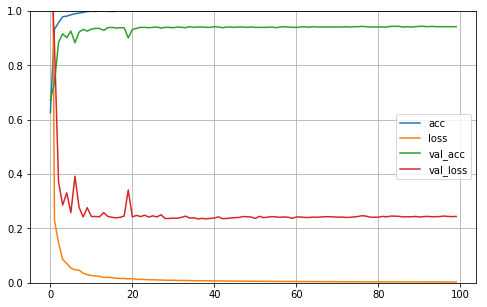

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


## Convolutional Neural Network

In [11]:
X_train = X_train.reshape(1000,8,8,1)
X_test = X_test.reshape(797,8,8,1)

from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[8, 8, 1]),
 keras.layers.MaxPooling2D(pool_size=2),
    
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 #DefaultConv2D(filters=256),
 #DefaultConv2D(filters=256),
 #keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 64)          3200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 256)         590080    
__________

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 1000 samples, validate on 797 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2887 - acc: 0.1350 - val_loss: 2.2509 - val_acc: 0.2785
Epoch 2/100
1000/1000 [==============================] - 0s 302us/step - loss: 2.2179 - acc: 0.2020 - val_loss: 2.1570 - val_acc: 0.2685
Epoch 3/100
1000/1000 [==============================] - 0s 309us/step - loss: 2.0998 - acc: 0.2580 - val_loss: 2.0216 - val_acc: 0.4166
Epoch 4/100
1000/1000 [==============================] - 0s 310us/step - loss: 1.9836 - acc: 0.3110 - val_loss: 1.8982 - val_acc: 0.4341
Epoch 5/100
1000/1000 [==============================] - 0s 316us/step - loss: 1.7931 - acc: 0.3910 - val_loss: 1.6675 - val_acc: 0.6236
Epoch 6/100
1000/1000 [==============================] - 0s 319us/step - loss: 1.6878 - acc: 0.4070 - val_loss: 1.3701 - val_acc: 0.6035
Epoch 7/100
1000/1000 [==============================] - 0s 321us/step - loss: 1.5010 - acc: 0.4680 - val_loss: 1.1593 - val_acc: 0.7

1000/1000 [==============================] - 0s 297us/step - loss: 0.0379 - acc: 0.9900 - val_loss: 0.2470 - val_acc: 0.9561
Epoch 61/100
1000/1000 [==============================] - 0s 311us/step - loss: 0.0534 - acc: 0.9830 - val_loss: 0.2026 - val_acc: 0.9598
Epoch 62/100
1000/1000 [==============================] - 0s 321us/step - loss: 0.0402 - acc: 0.9870 - val_loss: 0.2178 - val_acc: 0.9586
Epoch 63/100
1000/1000 [==============================] - 0s 313us/step - loss: 0.0389 - acc: 0.9880 - val_loss: 0.2094 - val_acc: 0.9573
Epoch 64/100
1000/1000 [==============================] - 0s 312us/step - loss: 0.0287 - acc: 0.9930 - val_loss: 0.2484 - val_acc: 0.9523
Epoch 65/100
1000/1000 [==============================] - 0s 327us/step - loss: 0.0469 - acc: 0.9840 - val_loss: 0.2732 - val_acc: 0.9523
Epoch 66/100
1000/1000 [==============================] - 0s 330us/step - loss: 0.0407 - acc: 0.9930 - val_loss: 0.1817 - val_acc: 0.9636
Epoch 67/100
1000/1000 [=======================

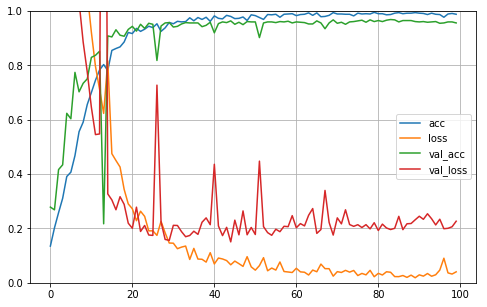

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()